In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('higgs_data_cleansed.csv', header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.0,...,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000
1,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.0,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
2,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.0,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
3,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.0,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
4,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.0,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233


In [7]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=60, criterion='entropy', random_state=42)
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)

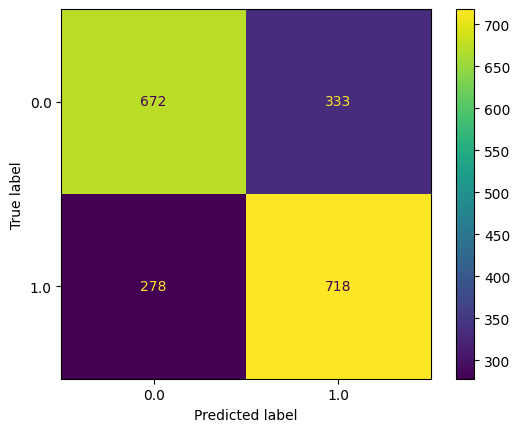

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [56]:
accuracy_score(Y_test,Y_pred)

0.6946526736631684

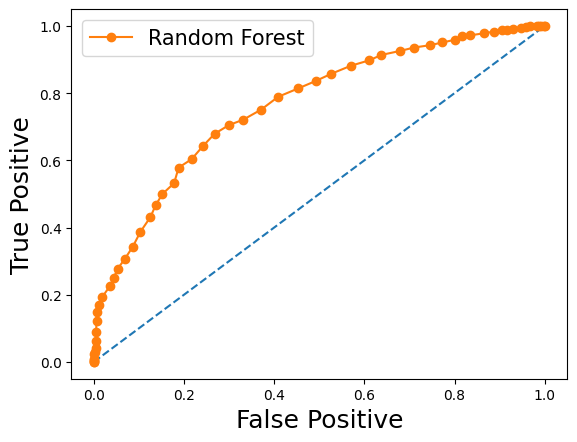

In [57]:
from sklearn.metrics import roc_curve,roc_auc_score
Y_pred_prob = rfc.predict_proba(X_test)
Y_test_01 = pd.factorize(Y_test)[0].tolist()

fpr, tpr, thresholds = roc_curve(Y_test_01, Y_pred_prob[:,1])

plt.plot([0,1],[0,1], '--')
plt.plot(fpr,tpr, 'o-', label='Random Forest')
plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.legend(fontsize=15)
plt.show()

In [58]:
print(f'model 1 AUC score: {roc_auc_score(Y_test, Y_pred_prob[:,1])}') 

model 1 AUC score: 0.7641860976243282
